---
# **Customer Purchase  Behavior Analysis on Black Friday**

---
## **Index**
#### **1. Introduction**
#### **2. Preprocessing**
> ##### 2.1 Importing libraries
> ##### 2.2 Importing dataset
#### **3. Age Group Analysis**
> ##### 3.1 Total of Purchases by Age Group
> ##### 3.2 Purchase Mean by Age Group and City
#### **4. Product Category Analysis**
> ##### 4.1 Number of Purchase of Each Product Category by City
> ##### 4.2 Purchase Mean of Product_Category 1 by City
> ##### 4.3 Purchase Mean of Product_Category 2 by City
> ##### 4.4 Purchase Mean of Product_Category 3 by City
#### **5. Gender Analysis**
> ##### 5.1 Purchase Mean by Gender
> ##### 5.2 Purchase Mean by Gender and Age Group
> ##### 5.3 Purchase Mean by Gender and City
#### **6. Occupation Analysis**
> ##### 6.1 Purchase Mean by Occupation
> ##### 6.2 Purchase Mean by Occupation and City
#### **7. Marital Status Analysis**
#### **8. HeatMap**
#### **9. ClusterMap**


---
#### **1. Introduction**

 In this post we'll explore some questions we might want to ask of our data, and how extract those answers as quickly as possible. To do that, we will write a functions to make our lives easier since we will be plotting a few bar charts in order to answer different questions.

---
#### **2. Preprocessing**

##### **2.1 Importing libraries**


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('ticks')
plt.style.use('ggplot')

In [53]:
data =  pd.DataFrame({
'Variables': ['User_ID','Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status',
           'Product_Category_1', 'Product_Category_2','Product_Category_3','Purchase'],
'Definition' : ['User ID','Product ID','Sex of User','Age in bins',"Occupation (Masked)","Category of the City (A,B,C)"
               ,'Number of years stay in current city','Marital Status',"Product Category (Masked)","Product may belongs to other category also (Masked)",
            "Product may belongs to other category also (Masked)","Purchase Amount  (Target Variable)"]} )
data.set_index('Variables')

,Definition
Variables,
User_ID,User ID
Product_ID,Product ID
Gender,Sex of User
Age,Age in bins
Occupation,Occupation (Masked)
City_Category,"Category of the City (A,B,C)"
Stay_In_Current_City_Years,Number of years stay in current city
Marital_Status,Marital Status
Product_Category_1,Product Category (Masked)


In [54]:
pd.set_option('display.max_columns', 12)

##### **2.2 Importing dataset**


We will use the Black Friday dataset, which can be found on Kaggle:
https://www.kaggle.com/sdolezel/black-friday

In [55]:
df = pd.read_csv('train.csv')
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [57]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Although our first impression of the data is that they seem to be organized, there are still some missing values. The Product_Category (2 and 3) columns have tons of NaNs variables instead of numerical representation. The information we can get from it is that each NaN represents the fact that the product of this given row does not belong to that specific category. 

For instance, the product of the first row ( Product_id = P00069042 ) is identified as product 3 and belongs only to the category number one. On the other hand, the product of the second row is identified as 1 in category 1, as 6 in the second category and 14 in the third category of product which means that it belongs to all of the categories.

In addition to that, we have to be aware of the fact that `groupby` and `pivot_table` ignore NaNs automatically. That make our job significantly easier since we will be using these two techniques in order to group some data and compute operations on them. In addition to that, it is also important to mention that even though our data might have some outliers, we will consider that it is already mined regarding this issue.

---
#### **3. Age Group Analysis**

##### **3.1 Total of Purchases by Age Group**

We will commence this project by identifying the total of purchase by age group and the purchase means by age group and city. In order to do that, we have to, first, use the `value_counts()` method to count the number of purchase of each group and plot a simple bar chat and, second, to create a multilevel pivot table DataFrame in which the indexes are the columns Age and City_Category and than plot a bar chart.

The plot below shows that people between 26 and 35 years old take the top spot in terms of quantity of purchases, followed by the 36-45 and 18-25 age groups which have about half of purchases when compared to the first group.

In [58]:
color_1 = ['lightslategray', 'mediumvioletred', 'sandybrown', 'sienna' , 'navy', 'olive', 'darkgreen']

Text(0, 0.5, 'Number of Purchase')

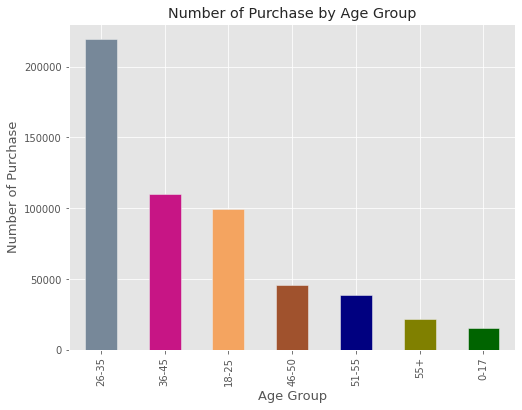

In [59]:
df.Age.value_counts().plot(kind = 'bar', color = color_1, title = 'Number of Purchase by Age Group', figsize =(8,6))
plt.xlabel('Age Group', fontsize = 13)
plt.ylabel('Number of Purchase', fontsize = 13)


---
##### **3.2 Purchase Mean by Age Group and City**

In [60]:
age_group_city = df.loc[:,['Age', 'City_Category', 'Purchase']] 

age_group_city = age_group_city.pivot_table(age_group_city, index = ['Age', 'City_Category'], aggfunc = 'mean')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


Text(0.5, 0, 'Purchase Mean')

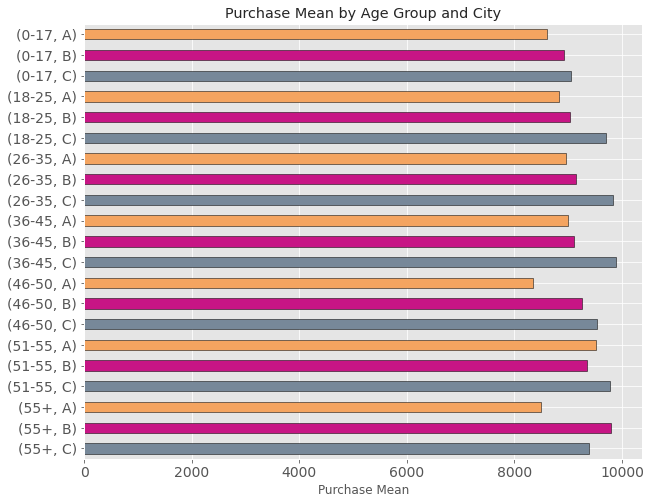

In [61]:
color = ('lightslategray','mediumvioletred','sandybrown')

age_group_city.sort_index(ascending=False).plot(
    kind='barh',
    figsize=(10, 8),
    cmap='viridis',
    edgecolor='black',
    fontsize=14,
    legend = False,
    title='Purchase Mean by Age Group and City',
    color = color
    ).yaxis.label.set_visible(False)
plt.ylabel('Age_Group, City')
plt.xlabel('Purchase Mean')


Even though the plot above give us the information we want, it's a bit confusing. We have to bear in mind that the easier to understand the plot the 'happier' the person who is reading it will be. As Data Scientists or Data Analysts we have the obligation to deliver the message as clear as possible so that those who look at the plot or dashboard understand everything straightaway. So, in order to make a clear comparison between those groups we will plot each of them separately.

In [62]:
def trim_axs(axs, N):
    axs = axs.flatten()
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

In [63]:
def individual_bar_plots(dataframe, item, title, ax = None):
    

    obj = dataframe.loc[item,:]

    obj.plot( kind = 'barh',
            color = color,
            edgecolor = 'black', 
            ax = ax,   
            legend = None,              
            ).set_title(f'{title} {item}')
    
    ax.set_xlabel('Purchase Mean')

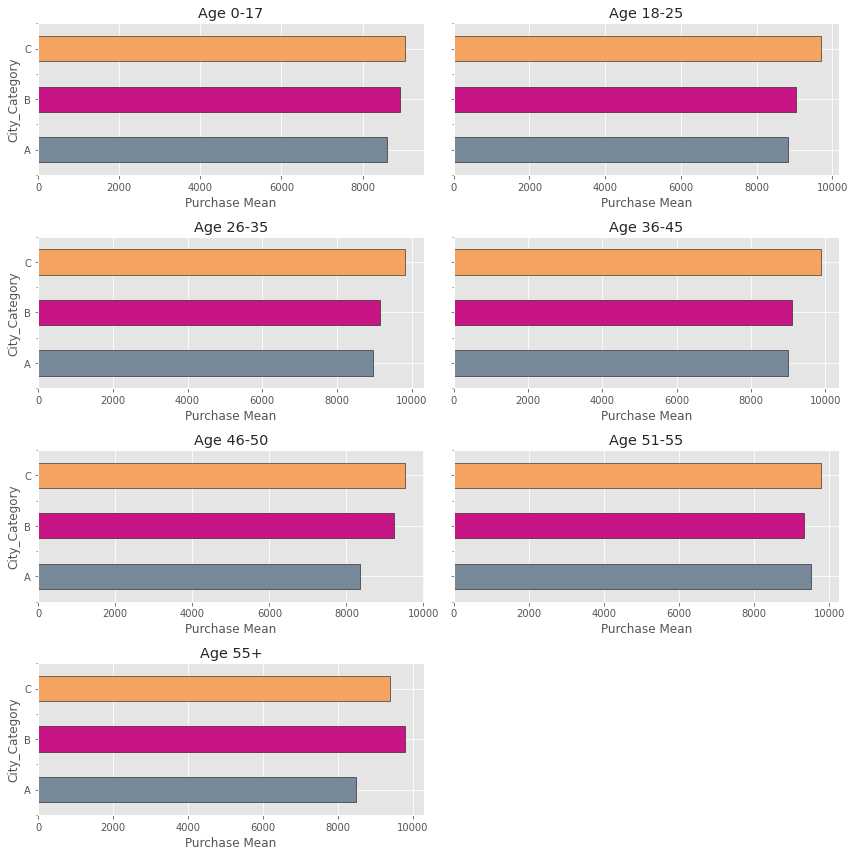

In [64]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 12), sharey=True)

ax = trim_axs(ax, len(df.Age.unique()))

age_list = ['0-17','18-25','26-35','36-45', '46-50','51-55','55+']

for subplot, Age in zip(ax.flatten(), age_list):
    individual_bar_plots(age_group_city, Age, ax=subplot, title = 'Age')
    
plt.tight_layout()

Now we can clearly see that, for example, from age 0 to 55 the mean purchase of city C is greater than others. We can also see that city B takes the first spot only in the 55+ age group . In short, we can get a lot of information from those plots, and those who need them to make business decisions will probably be glad.

---

#### **4. Product Category Analysis**

Our second task is to analyse the categories and the products. We will start off plotting a bar chart with the total of purchases of each category in each city. Then, we will make use of the function we have built to plot individual charts of all products for each category. It's important to mention that one product may belongs to different category and groups. For example, the product **P00248942** belongs to all categories but is named as group 1 in the first category, group 6 in the second and 14 in the third one. With that said, let's start our analysis.

In [65]:
df.head(2 )

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


##### **4.1 Number of Purchase of Each Product Category by City**

The chart below shows that we have sort of a pattern in terms of quantity of purchases. As we can see, the product category 1 takes the top spot, followed by product category 2 and product category 3 in all of the cities. What differ each city regarding the number of purchases is the fact that consumers of city B buy more product of all category than city A and C. 

Text(0.5, 1.0, 'Purchases of Each Product Category by City')

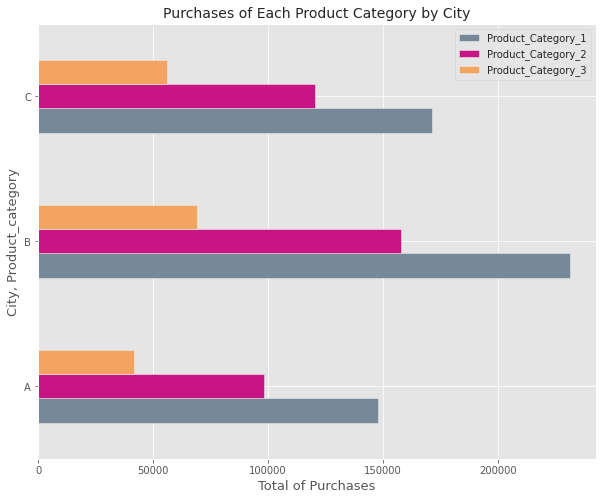

In [66]:
Purchase_by_City_df = df.loc[:,[ 'City_Category','Product_Category_1', 'Product_Category_2','Product_Category_3']] 

Purchase_by_City_Pivt = Purchase_by_City_df.pivot_table(Purchase_by_City_df, index = ['City_Category'], aggfunc = 'count')

Purchase_by_City_Pivt.plot( kind = 'barh',figsize =(10,8), color = color)

plt.xlabel('Total of Purchases', fontsize = 13)
plt.ylabel('City, Product_category', fontsize = 13)
plt.title('Purchases of Each Product Category by City', fontsize = 14 )


In [67]:
Purchase_by_City_Pivt

,Product_Category_1,Product_Category_2,Product_Category_3
City_Category,,,
A,147720,98361,41519
B,231173,157683,69243
C,171175,120386,56059


##### **4.2 Purchase Mean of Product_Category 1 by City**

In [68]:
df_city_A = df.loc[df.City_Category == 'A', :]
df_city_B = df.loc[df.City_Category == 'B', :]
df_city_C = df.loc[df.City_Category == 'C', :]
df_city_A.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [69]:
City_A_Category_1 = df_city_A.groupby('Product_Category_1').mean()['Purchase']
City_B_Category_1 = df_city_B.groupby('Product_Category_1').mean()['Purchase']
City_C_Category_1 = df_city_C.groupby('Product_Category_1').mean()['Purchase']

In [70]:
type(City_C_Category_1)

pandas.core.series.Series

In [71]:
prod1_df = pd.concat([City_A_Category_1,City_B_Category_1, City_C_Category_1], axis = 1)
prod1_df.columns = ['City_A', 'City_B', 'City_C']

In [72]:
prod1_df

,City_A,City_B,City_C
Product_Category_1,,,
1,13047.176933,13435.925703,14233.967350
2,10903.554796,11133.902528,11715.205111
3,10032.381145,9998.072552,10271.016609
4,2269.740000,2300.053578,2426.718723
5,6117.839355,6168.591974,6458.683833
6,15519.767750,15751.003049,16227.248407
7,16239.243883,16355.068793,16557.659598
8,7328.067156,7454.787942,7721.211798
9,14821.145455,15690.545977,15951.134921


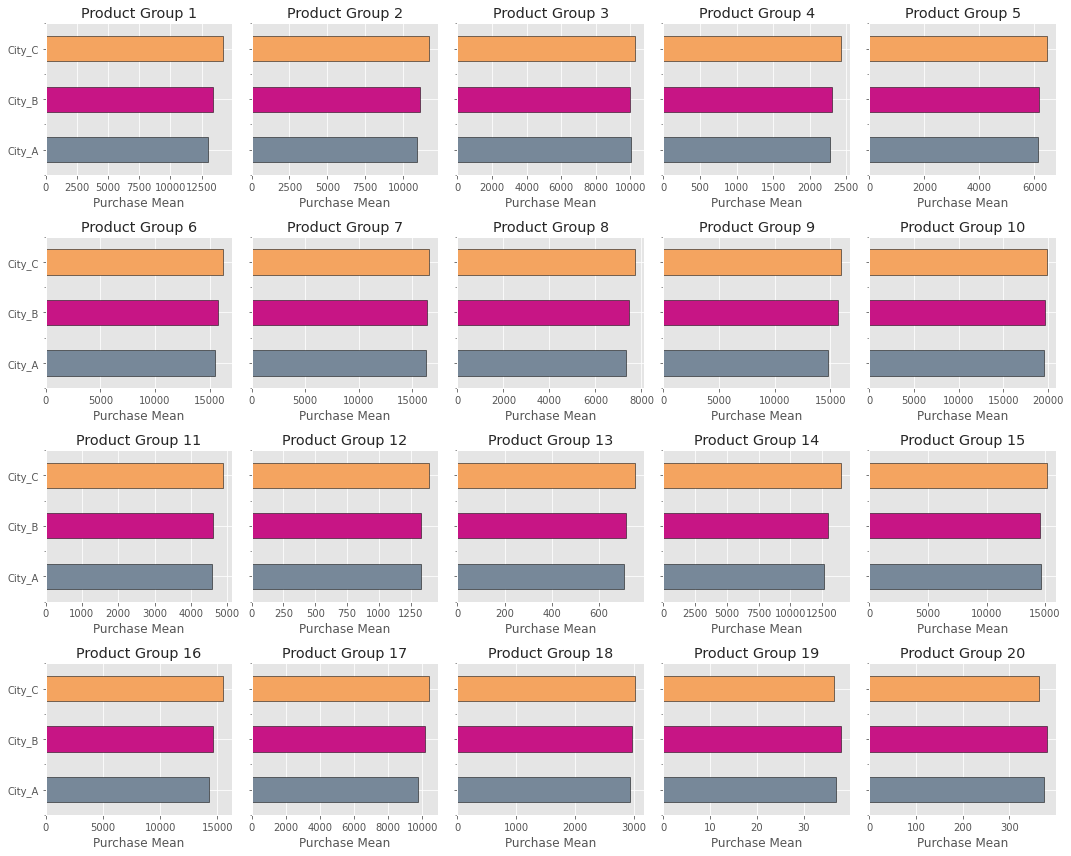

In [73]:
fig, ax = plt.subplots(nrows = 4 , ncols= 5, figsize = (15,12), sharey = True)

color = ['lightslategray','mediumvioletred','sandybrown']

product_category_1_list = sorted(list(df.Product_Category_1.unique()))

for subplot, product in zip(ax.flatten(),product_category_1_list ):
    individual_bar_plots(prod1_df,product,ax = subplot, title = 'Product Group')
    
plt.tight_layout()

In [74]:
fig.savefig('Prod_City.png')

The first thing that catches my eye is the product 19 with its way lower purchase mean compared to the other products (less than 40 USD on average). In addition, we can notice that product 4 has the greatest purchase mean with city C taking the top spot followed by city B which has a slight advantage over city C.

##### **4.3 Purchase Mean of Product_Category 2 by City**

In [75]:
City_A_Category_2 = df_city_A.groupby('Product_Category_2').mean()['Purchase']
City_B_Category_2 = df_city_B.groupby('Product_Category_2').mean()['Purchase']
City_C_Category_2 = df_city_C.groupby('Product_Category_2').mean()['Purchase']

In [76]:
prod2_df = pd.concat([City_A_Category_2,City_B_Category_2,City_C_Category_2], axis = 1)
prod2_df.columns =['City_A', 'City_B', 'City_C']

In [77]:
prod2_df

,City_A,City_B,City_C
Product_Category_2,,,
2.0,13053.860529,13451.023996,14215.305696
3.0,11057.043662,11138.206633,11476.698397
4.0,10076.695707,10104.359840,10475.700025
5.0,8657.538225,8752.697299,9728.257501
6.0,11230.700320,11241.891267,12084.406613
7.0,6853.707182,6770.263158,7086.039106
8.0,9804.542869,10178.217450,10807.470815
9.0,7220.100000,7209.586500,7421.354227
10.0,15231.085897,15638.343284,15968.774834


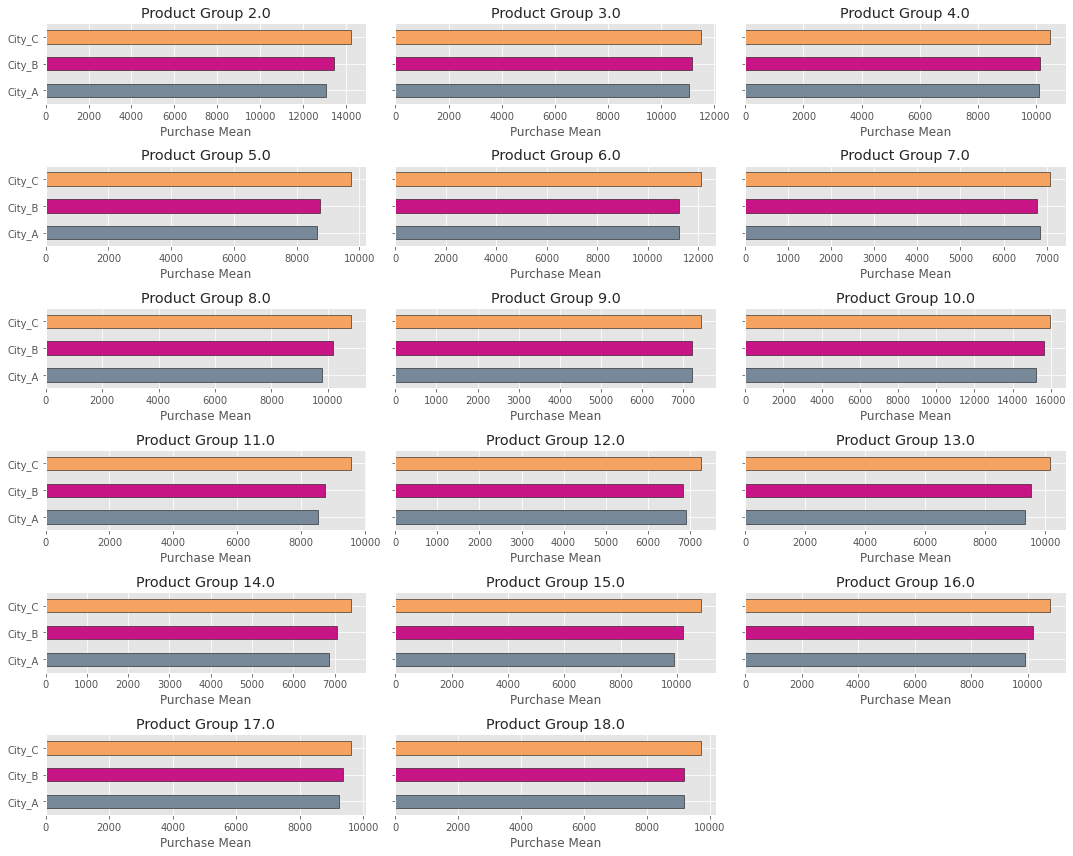

In [78]:
fig, ax = plt.subplots(nrows=6 , ncols=3, sharey = True, figsize = (15,12))

ax = trim_axs(ax, len(df.Product_Category_2.unique()[1:]) )

product_category_2_list = sorted(list(df.Product_Category_2.unique()[1:]))

for subplot, product in zip(ax.flatten(), product_category_2_list):
    individual_bar_plots(prod2_df,product,ax = subplot, title = 'Product Group')

plt.tight_layout()

In [79]:
fig.savefig('Product_Category_2_by_City.png')

Let's now analyse all products of category 2. As mentioned in the description of the data, the product may belongs to other category and we can notice this looking at the plots above.We have a group of 17 products that also belong to the first category and, as can be seen, the product 10 has the greatest purchase mean. Once again, the city C takes the first position, followed by city B and A (similar to product category 1).

##### **4.4 Purchase Mean of Product_Category 3 by City**

In [80]:
City_A_Category_3 = df_city_A.groupby('Product_Category_3').mean()['Purchase']
City_B_Category_3 = df_city_B.groupby('Product_Category_3').mean()['Purchase']
City_C_Category_3 = df_city_C.groupby('Product_Category_3').mean()['Purchase']

In [81]:
prod3_df = pd.concat([City_A_Category_3,City_B_Category_3,City_C_Category_3] , axis =1 )
prod3_df.columns = ['City_A', 'City_B', 'City_C']
prod3_df

,City_A,City_B,City_C
Product_Category_3,,,
3.0,13938.342105,13943.672862,13935.197917
4.0,9441.350105,9617.795995,10311.071786
5.0,11871.984287,12050.546659,12369.554136
6.0,12550.282780,13051.897374,13901.034439
8.0,12651.704656,12879.617802,13457.729853
9.0,9969.299221,10323.745929,10862.824780
10.0,13807.337264,13311.284058,13516.236928
11.0,11439.055066,12046.810881,12662.480138
12.0,8566.453079,8637.773274,8952.219504


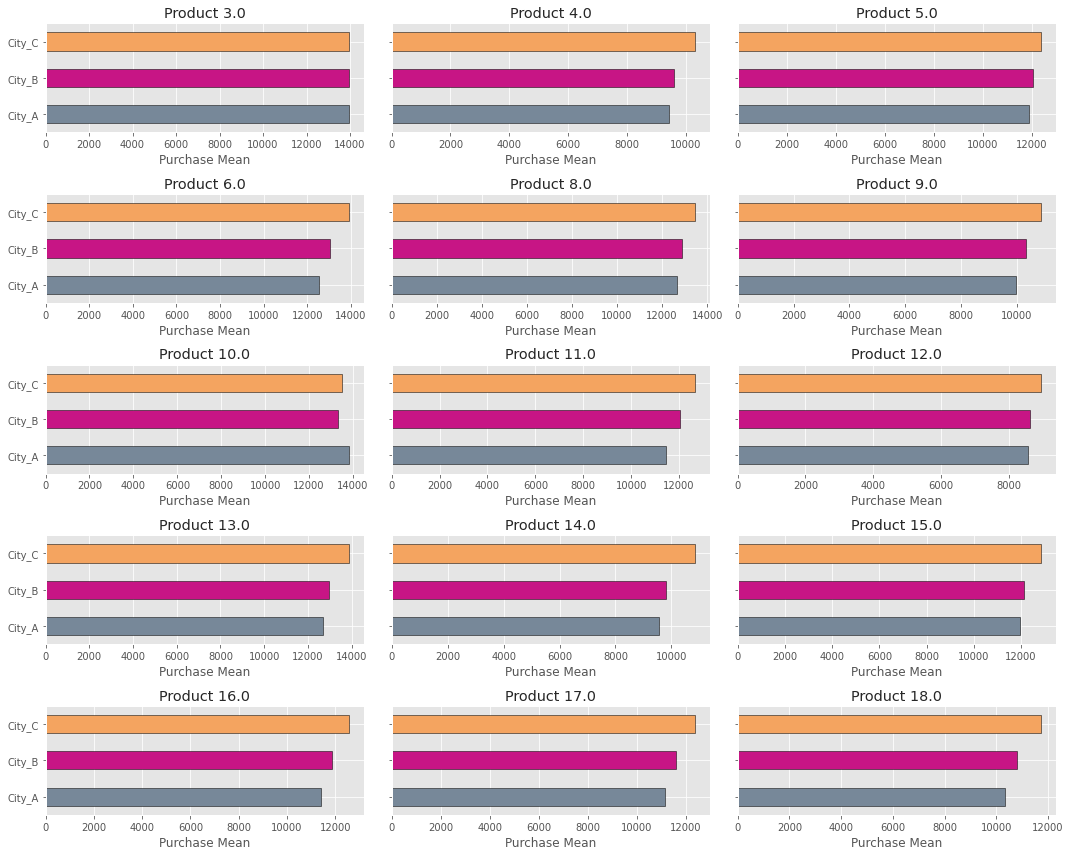

In [82]:
fig, ax  = plt.subplots( nrows= 5, ncols=3, sharey = True, figsize = (15,12))

product_category_3_list = sorted(list(df.Product_Category_3.unique()[1:]))

for subplot, product in zip(ax.flatten(), product_category_3_list):
    individual_bar_plots(prod3_df,product, ax = subplot, title = 'Product')

plt.tight_layout()

The plots above show information regarding the third product category. As can be seen, we have 15 products in this category and product 3 has the greatest purchase mean in all of the cities. 

In [83]:
fig.savefig('Product_Category_3_by_City.png')

---

#### **5. Gender Analysis**

We all know the relevance of understanding the impact of gender on purchase decision-making. In fact, many studies have been raising questions, for example, about who makes the purchase decision in households. In addition to that, it seems also important to inspect gender differences in purchase decision-making styles and patterns concerning to product categories, price and others characteristics.

That said, let's work on our data analysis and get some simple but relevant insights into the customers behavior. First, we will plot the total of purchases and the mean purchase of each gender. Then, we will plot the purchase Mean by age group and finally we will see how men and women differ from each other in terms of product acquisition in cities A, B and C.

##### **5.1 Number of Purchases and Purchase Mean by Gender**

Now, looking at the graphs below we can see that the total of male consumers (**414259**) is three times more than the number of female (**135809**). We can also notice that, surprisingly, there's no big difference concerns the purchase mean o both genders. 

Even though evident disparity in quantity of men and women, the purchase mean  of male consumers has just a slight advantage over female mean purchase. Based on that, I would say that female consumers are really significant for the business and, for instance, could be target of specials marketing campaigns.

In [84]:
df.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [85]:
df.groupby('Gender').mean()['Purchase'].sort_values(ascending = False)

Gender
M    9437.526040
F    8734.565765
Name: Purchase, dtype: float64

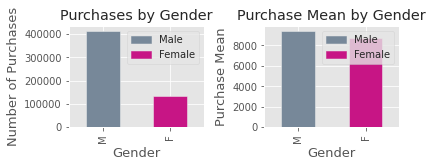

In [86]:
plt.subplot(221)

df.Gender.value_counts().plot(kind= 'bar', title = 'Purchases by Gender', color = color)

plt.xlabel('Gender', fontsize = 13)
plt.ylabel('Number of Purchases', fontsize = 13)
import matplotlib.patches as mpatches
gray_patch = mpatches.Patch(color ='lightslategray', label = 'Male')
violet_patch = mpatches.Patch(color = 'mediumvioletred', label = 'Female')
plt.legend(handles = [gray_patch,violet_patch], loc = 'best')

plt.subplot(222)

df.groupby('Gender').mean()['Purchase'] .sort_values(ascending = False).plot(kind = 'bar',
                                                                         color = color,
                                                                         title = 'Purchase Mean by Gender')
                                                                    
plt.ylabel('Purchase Mean', fontsize = 13)
plt.xlabel('Gender', fontsize = 13)
plt.legend(handles = [gray_patch,violet_patch], loc = 'best')
plt.tight_layout()


plt.rcParams['figure.figsize'] =(12,8)

---

##### **5.2 Purchases Mean by Gender and Age Group**

With the purpose of comparing the purchase pattern of different age groups and genders, we can look at the bar charts below. They show that the purchase mean of the men's group is more than 1000 USD greatest than the purchase mean of women's group for customers aged from 18 to 25. We can also see that male consumers take the first spot in all age group, though the difference is not so noticeable as in the 18-25 age group.


In [87]:
gender_age_pvt = df.pivot_table(df , index = ['Age', 'Gender'], aggfunc = 'mean')['Purchase']
gender_age_pvt

Age    Gender
0-17   F         8338.771985
       M         9235.173670
18-25  F         8343.180201
       M         9440.942971
26-35  F         8728.251754
       M         9410.337578
36-45  F         8959.844056
       M         9453.193643
46-50  F         8842.098947
       M         9357.471509
51-55  F         9042.449666
       M         9705.094802
55+    F         9007.036199
       M         9438.195603
Name: Purchase, dtype: float64

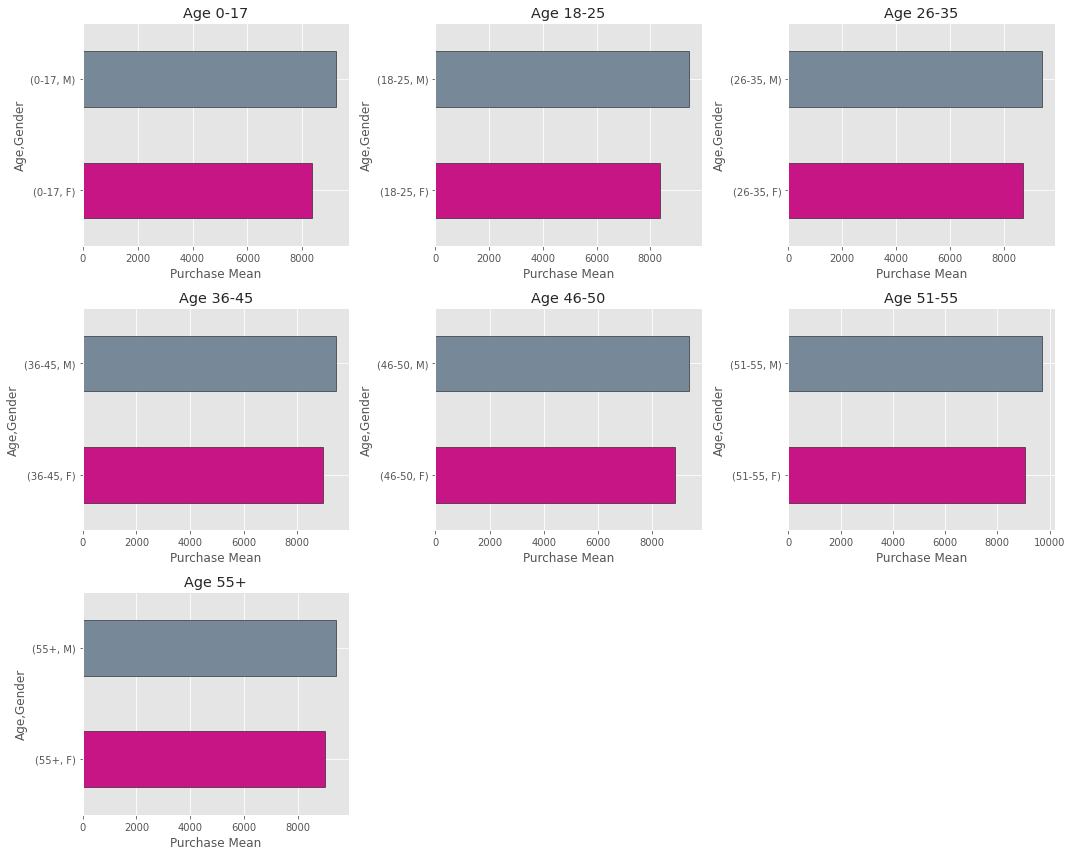

In [88]:
fig, ax = plt.subplots(nrows = 3 , ncols= 3, figsize = (15,12), sharey = False)

ax = trim_axs(ax, len(df.Age.unique()))

color = ['mediumvioletred','lightslategray']

for subplot, Age in zip(ax.flatten(),age_list ):
    individual_bar_plots(gender_age_pvt,Age,ax = subplot, title = 'Age')
    
plt.tight_layout()

In [89]:
fig.savefig('Age_Gender.png')

---

##### **5.3 Purchase Mean by Gender and City**

The last gender analysis consists in understanding how purchases were made for both gender in each city. In order to achieve that, let's take a moment to analyse the bar charts below that depict exactly what we are looking for. They show that males spend more money than women in all of the cities and that city C takes the first spot in regards purchase means for both genders. It is also worth noting that men based in city B bought more than those based in city A, whereas women from city A acquired more than those who live in city B.


In [90]:
purchase_mean_by_gender_city = df.loc[:,['Gender', 'City_Category','Purchase']]
pvt_purchase_mean_by_gender_city = purchase_mean_by_gender_city.pivot_table(purchase_mean_by_gender_city, 
                                                                           index = ['Gender','City_Category'],
                                                                           aggfunc = 'mean')

In [91]:
pvt_purchase_mean_by_gender_city

Purchase
Gender City_Category             
F      A              8579.708576
       B              8540.677694
       C              9130.107518
M      A              9017.834470
       B              9354.854433
       C              9913.567248

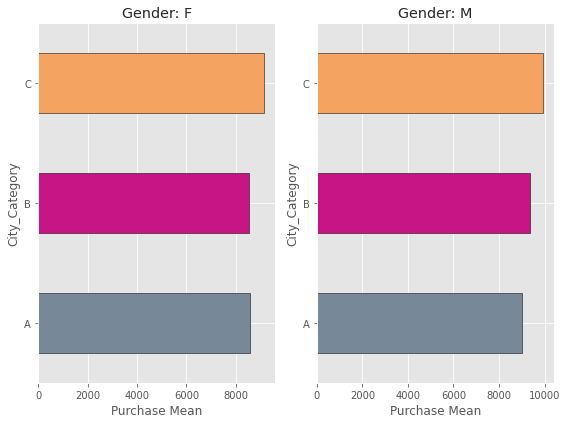

In [92]:
fig, ax = plt.subplots(nrows = 1 , ncols= 2, figsize = (8,6), sharey = False)

color = ('lightslategray','mediumvioletred','sandybrown')

gender_list = ['F','M']

for subplot, gender in zip(ax.flatten(),gender_list ):
    individual_bar_plots(pvt_purchase_mean_by_gender_city, gender, ax = subplot, title = 'Gender:')
    
plt.tight_layout()


---

#### **6. Occupation Analysis**

##### **6.1 Purchase Mean By Occupation**

Do you think that the type of consumers occupation impact on their buying behavior ? well, I would expect some association between occupation and the attitude of consumers toward the amount of money they expend. Let's examine 
this by plotting bar charts.


Let's start by plotting the purchase mean of each occupation. This bar chart gives us generalized information about the purchase habits of each consumer regarding their occupation. For instance, we can notice that occupations 12, 15 and 17 placed in top three spots concerning purchase means. We can also see that occupations 9, 19 and 20 expend less money than others. Are these information really helpful? Can we leverage insights concerning the amount of money each professional spend by city? well, this is exactly what we see in the subsequent visualization.


Although the first bar bar chart gives us important information, the second data viz allows us to have a better understanding of the money spent by each occupation in cities A, B and C.






Text(0, 0.5, 'Purchase Mean')

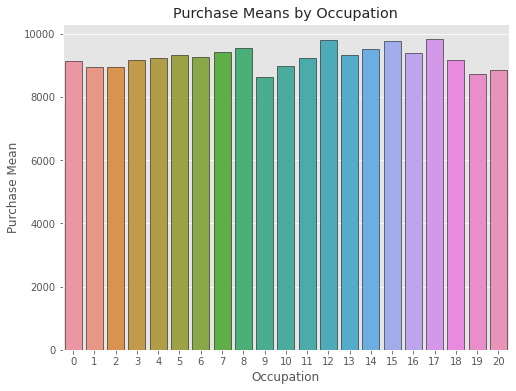

In [93]:
plt.figure(figsize=(8, 6))

sns.barplot(x = df.groupby('Occupation').mean()['Purchase'].index ,
           y = df.groupby('Occupation').mean()['Purchase'].values,
            orient = 'v',
            edgecolor = 'black')
plt.title('Purchase Means by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Purchase Mean')

##### **6.2 Occupation by City**

The bar charts below depict the purchase mean of each occupation in each city. It's interesting that city C has the greatest purchase means in almost all of the occupation. We see a change in this pattern only with occupations 8, 9 and 19. Another interesting fact is that we have the greatest amount of money (overall) spent in city A by people which number 8 is their occupation. 

So, the point is that if we separate each occupation in different charts, we are more likely to leverage insights easily. In other words, This makes it especially easy for colleagues on other teams (eg. Marketing department) to use our findings. We can simply export them to a plots folder, and people can browse the images and be able to drag and drop them right into a PowerPoint presentation or other report.

In [94]:
df.rename(columns= {"City_Category" : "City_Cat", "Occupation": "Occup"}, inplace= True)
df.head(3)

,User_ID,Product_ID,Gender,Age,Occup,City_Cat,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [95]:
occ_list = sorted(df.Occup.unique())

occupation_purchase_city = df.pivot_table(df, index = ['Occup','City_Cat'])['Purchase']

In [96]:
color = ['lightslategray','mediumvioletred','sandybrown']

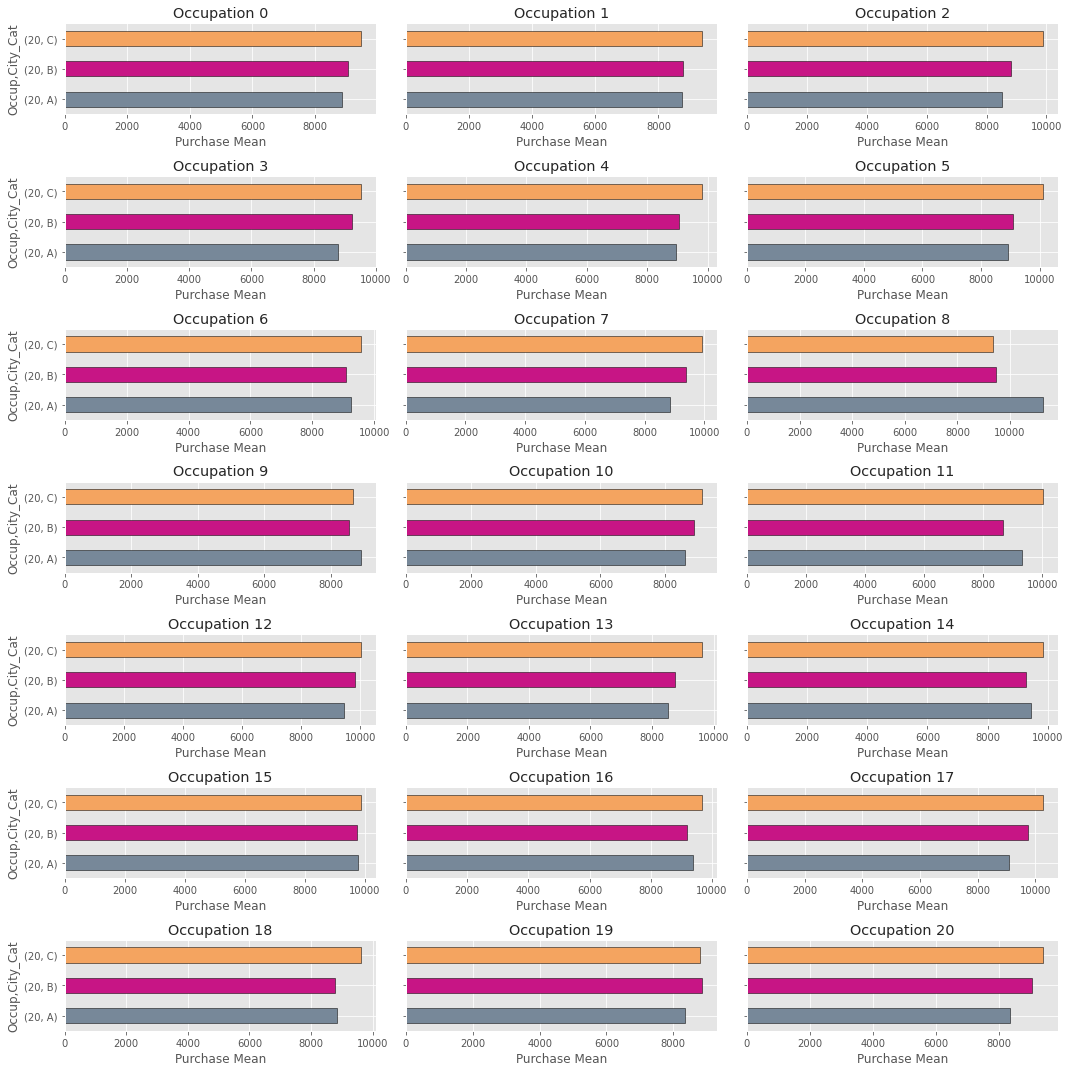

In [97]:
fig, ax = plt.subplots(nrows=7 , ncols=3, figsize = (15,15), sharey = True)

for subplot, occupation in zip(ax.flatten(), occ_list):
    individual_bar_plots(occupation_purchase_city,occupation, ax = subplot , title = 'Occupation')
       
plt.tight_layout()

In [98]:
fig.savefig("Occupation_cityCat.png")

#### **7. Marital Status Analysis**


In [99]:
df.head()

,User_ID,Product_ID,Gender,Age,Occup,City_Cat,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [100]:
df.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

Text(0.5, 0, 'Purchase')

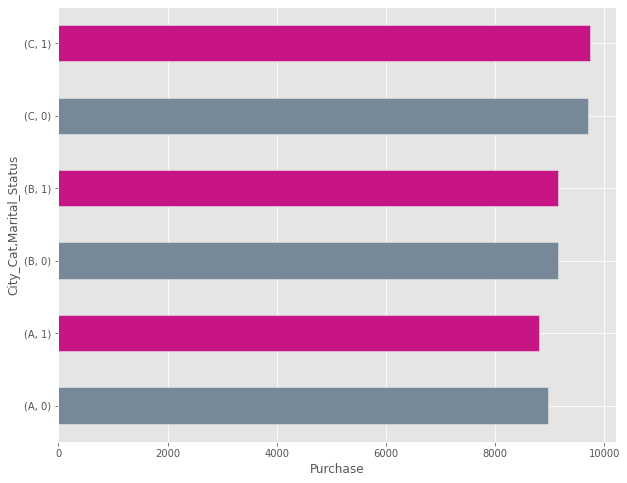

In [101]:
marital_status_city = df.pivot_table(df, index = ['City_Cat', 'Marital_Status'], aggfunc = 'mean')['Purchase']
marital_status_city.plot(kind = 'barh', color = color[0:-1], figsize = (10,8))
plt.xlabel('Purchase')

#### **8. HeatMap**

Basically, Heatmap is a graphical data representation that uses a scheme of color-coding to represent different values. In our case, we are generating a heatmap of correlations between features of our dataset.

In order to generate a heatmap, we have to numerically encoding the categorical data. In other words, we have to convert columns Product_ID,Gender,Age,City_Cat and Stay_In_Current_City_Years into numerical columns.

After the encoding, we end up with the graph below. It's interesting to note that there is a positive correlation between the products , which is exactly what we might expect to see since the they may belong to different categories. In addition, the correlation between age and marital status other interesting point to mention.

In [102]:
df.Product_ID

0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
550063    P00372445
550064    P00375436
550065    P00375436
550066    P00375436
550067    P00371644
Name: Product_ID, Length: 550068, dtype: object

In [103]:
def age_encoder(age_group):
    
    if age_group == '0-17':
        x = 1
        
    elif age_group == '18-25':
        x = 2
    
    elif age_group == '26-35':
        x = 3
        
    elif age_group == '36-45':
        x = 4 
        
    elif age_group == '46-50':
        x = 5
        
    elif age_group == '51-55':
        x = 6
        
    elif age_group == '55+':
        x = 7
        
    return x

In [104]:
df.head()

,User_ID,Product_ID,Gender,Age,Occup,City_Cat,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [105]:
df.Gender = df.Gender.map({'F': 0 , 'M': 1 })
df.City_Cat = df.City_Cat.map({ 'A':10, 'B':20, 'C':30})
df.Product_ID = df.Product_ID.str.replace("P","").astype(int)
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.map({'0':int(0),'1':int(1),'2': int(2),'3':int(3), '4+': int(4)})

df.head()

,User_ID,Product_ID,Gender,Age,Occup,City_Cat,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,0,0-17,10,10,2,0,3,NaN,NaN,8370
1,1000001,248942,0,0-17,10,10,2,0,1,6.0,14.0,15200
2,1000001,87842,0,0-17,10,10,2,0,12,NaN,NaN,1422
3,1000001,85442,0,0-17,10,10,2,0,12,14.0,NaN,1057
4,1000002,285442,1,55+,16,30,4,0,8,NaN,NaN,7969


In [106]:
df.Age = df.Age.apply(age_encoder)

In [107]:
df.head()

,User_ID,Product_ID,Gender,Age,Occup,City_Cat,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,0,1,10,10,2,0,3,NaN,NaN,8370
1,1000001,248942,0,1,10,10,2,0,1,6.0,14.0,15200
2,1000001,87842,0,1,10,10,2,0,12,NaN,NaN,1422
3,1000001,85442,0,1,10,10,2,0,12,14.0,NaN,1057
4,1000002,285442,1,7,16,30,4,0,8,NaN,NaN,7969


In [108]:
df.columns = [ 'User_ID','Prod_ID','Gender','Age','Occupation', 'City', 'Years_In_Citys', 'Marital_St', 
       'Prod_Cat1', 'Prod_Cat2', 'Prod_Cat3','Purchase'
        ]

In [109]:
df.head()

,User_ID,Prod_ID,Gender,Age,Occupation,City,Years_In_Citys,Marital_St,Prod_Cat1,Prod_Cat2,Prod_Cat3,Purchase
0,1000001,69042,0,1,10,10,2,0,3,NaN,NaN,8370
1,1000001,248942,0,1,10,10,2,0,1,6.0,14.0,15200
2,1000001,87842,0,1,10,10,2,0,12,NaN,NaN,1422
3,1000001,85442,0,1,10,10,2,0,12,14.0,NaN,1057
4,1000002,285442,1,7,16,30,4,0,8,NaN,NaN,7969


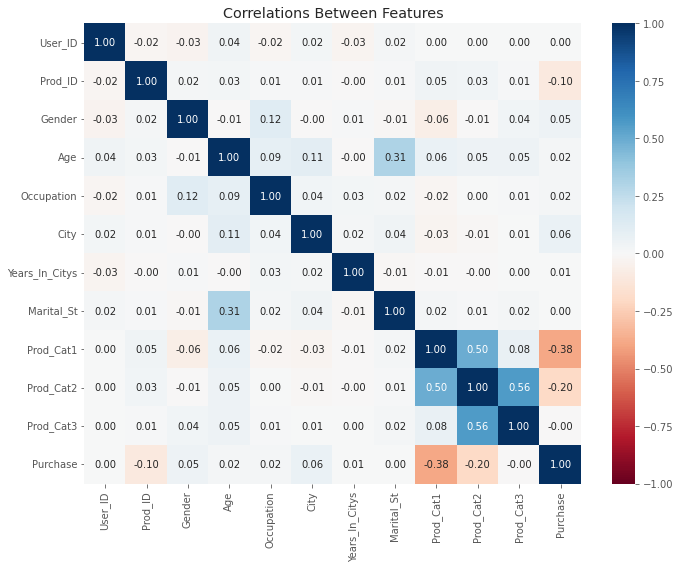

In [110]:
corr_matrix = df.corr(method='spearman')

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt='.2f',
           vmin=-1, vmax=1)

plt.title("Correlations Between Features")

plt.tight_layout()
plt.show()

In [111]:
fig.savefig('Cor_matrix.png')

#### **9. ClusterMap**

We will finish this analysis by plotting a clustermap. Clustermaps use hierarchical clustering to group features together by how closely related they are. This make correlations between the variables especially informative when we are analyzing relationships between them. In our case we have 11 features that we want to investigate, so instead of eyeballing the heatmat for which variable is positive or negative associated, the graph will be segmented into clusters, which is easier to analyse.

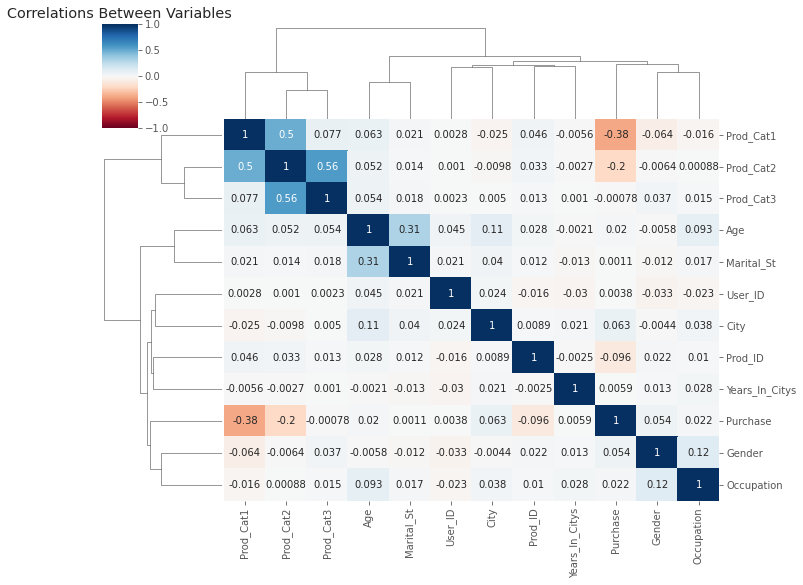

In [112]:
clustermap = sns.clustermap(corr_matrix, method='ward', cmap='RdBu', annot=True,
               vmin=-1, vmax=1, figsize=(10,8))

plt.title("Correlations Between Variables")
plt.show()

In [113]:
clustermap.savefig('Clustermap.png')

Looking at the plot above, we can see that the clustering algorithm believes product_category 2 and 3 cluster together, while age and marital status form another strongly associated cluster. We can see that by looking at the 
link between them. They are formed first and have the shortest branch, which indicate that they are more similar them those with highest branch.